In [30]:
from utils import layer_sizes,initialize_parameters,forward_propagation,backward_propagation,cost_function,update_parameters,predict_value,neural_network_model
import numpy as np
import matplotlib.pyplot as plt
# A library for data manipulation and analysis.
import pandas as pd

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 
#for consistent result of random numbers
np.random.seed(3) 

In [31]:
df =pd.read_csv("C:/pythonprojects/calculas_neural_network/datas/tvmarketing.csv")
df.head()
df.TV


0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

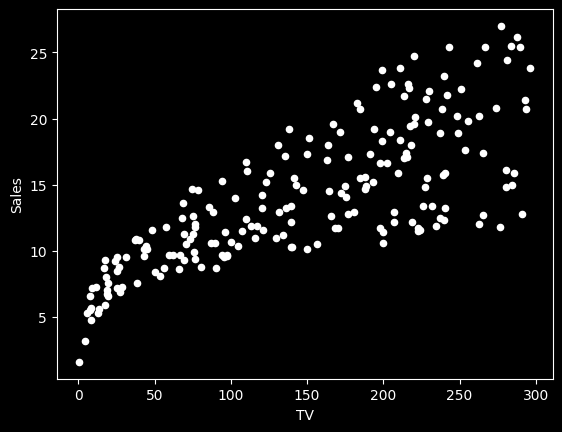

In [22]:
df.plot(x='TV', y='Sales', kind='scatter', c='white')

In [8]:
df_norm = (df - np.mean(df)) / np.std(df,axis = 0)  #normalizing the datasets for smooth operation
df_norm

,TV,Sales
0,1.746481,-11.227526
1,-0.420747,-13.475626
2,-0.739526,-13.686985
3,0.828679,-11.919249
4,1.170811,-12.995263
...,...,...
195,-0.494311,-14.013632
196,0.159594,-13.610127
197,1.126439,-13.014477
198,2.371194,-10.574233


(1, 200)

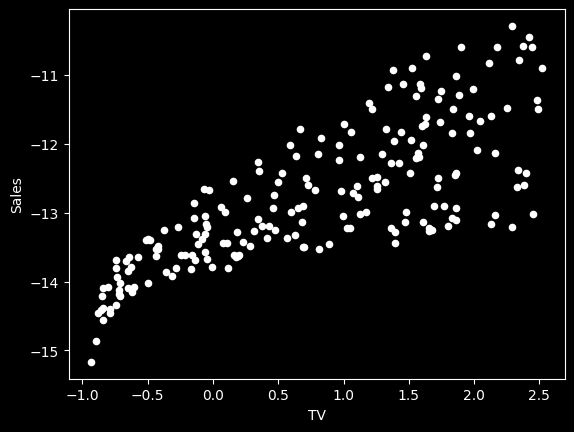

In [20]:
df_norm.plot(x='TV', y='Sales', kind='scatter', c='white')
X_norm = df_norm['TV']
Y_norm = df_norm['Sales']
X_norm = np.array(X_norm).reshape((1,len(X_norm)))  #converting the datasets into row vector which denotes one feature which is TV and multiple samples
X_norm
Y_norm = np.array(Y_norm).reshape((1,len(Y_norm)))    #1 row and 200 columns
Y_norm
Y_norm.shape


In [10]:
#defining the neural network structure


(n_x, n_y) = layer_sizes(X_norm, Y_norm)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


In [11]:

parameters = initialize_parameters(n_x,n_y)
parameters

{'w': array([[0.17886285]]), 'b': array([[0.]])}

In [12]:

Y_predicted = forward_propagation(X_norm,parameters)    


In [13]:

cost_function(Y_predicted,Y_norm)    
    

np.float64(83.8197722439222)

In [14]:

grads = backward_propagation(Y_predicted,Y_norm,X_norm)    
    
    
    

In [15]:

updated_paramters = update_parameters(parameters,grads,0.1)   
updated_paramters
    
    

{'w': array([[-0.76408854]]), 'b': array([[-1.29184896]])}

In [16]:

final_parameters = neural_network_model(X_norm,Y_norm,30,0.1,print_cost=False)    



In [17]:
X_pred = np.array([50, 120, 280])  #this is the marketing expense value
#X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))


In [18]:

Y_pred = predict_value(df['TV'],df['Sales'],X_pred,final_parameters)  
Y_pred
    

array([[-39.69058466, -42.87553647, -50.1554263 ]])

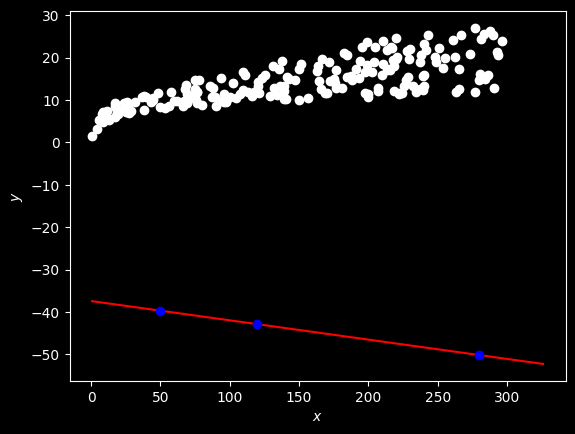

In [21]:
fig, ax = plt.subplots()
plt.scatter(df["TV"], df["Sales"], color="white")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(df["TV"]),np.max(df["TV"])*1.1, 0.1)
Y_line = predict_value(df["TV"], df["Sales"], X_line,final_parameters)
ax.plot(X_line, Y_line.flatten(), "r")
ax.plot(X_pred, Y_pred.flatten(), "bo")
plt.plot()
plt.show()

np.float64(147.0425)